**Description:-** IPL is a popular cricket tournament, featuring some of the exciting cricketing talents in the world playing against each other. Data Analytics has proved to be one of the most important tools in Cricket, today. In this **Part 1** notebook on **IPL Data Analytics**, we are going to analyze the history of IPL. If you are a cricket fan or someone who is interested to know some of the key facts of this tournament, then get ready to get your hands dirty with data.

**Note:-** To follow-on with this notebook, you should have a good understanding of working with Pandas (Dataframes, Groupby functions, etc) and Python visualization libraries like Matplotlib and Seaborn.

In [1]:
# Importing the libraries:-

import math
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
# Loading the datasets:-

ipl_data1 = ipl_data1 = pd.read_csv('C:\\Users\\raj28\\OneDrive\\Desktop\\Machine Learning Projects\\Data Science Projects\\IPL Data Analysis Project\\IPL Data Analysis Main\\Data\\ipl_data.csv', parse_dates=True)
ipl_data2 = pd.read_csv('C:\\Users\\raj28\\OneDrive\Desktop\\Machine Learning Projects\\Data Science Projects\\IPL Data Analysis Project\\IPL Data Analysis Main\\Data\\deliveries.csv', parse_dates = True)
match_data = pd.read_csv('C:\\Users\\raj28\\OneDrive\\Desktop\\Machine Learning Projects\\Data Science Projects\\IPL Data Analysis Project\\IPL Data Analysis Main\\Data\\matches.csv', parse_dates = True)
model_data = pd.read_csv('C:\\Users\\raj28\\OneDrive\\Desktop\\Machine Learning Projects\\Data Science Projects\\IPL Data Analysis Project\\IPL Data Analysis Main\\Data\\ipl.csv', parse_dates = True)

**> About the Datasets:-**

**deliveries :-** This dataset has bowl by bowl information of the matches played between different teams in IPL. One very important aspect which is missing in this data is the date.

**ipl_data :-** This dataset has bowl by bowl information of all the matches played in IPL from 2008 to 2021 (incomplete).

**matches :-** This data is very similar to the ipl_data dataset. One difference is that the data is available uptill 2017 season.

**> Checking the head and info of all the datasets:-**

In [3]:
ipl_data1.head()     # ipl_data dataset

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,runs_off_bat,extras,wides,noballs,byes,legbyes,wicket_type,player_dismissed,run,over
0,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,...,0,1,0.0,0.0,0.0,1.0,,,1,0
1,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,0,0.0,0.0,0.0,0.0,,,0,0
2,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,1,1.0,0.0,0.0,0.0,,,1,0
3,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,0,0.0,0.0,0.0,0.0,,,0,0
4,335982,2008,2008-04-18,M.Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,0,0.0,0.0,0.0,0.0,,,0,0


In [4]:
ipl_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194354 entries, 0 to 194353
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   match_id          194354 non-null  int64  
 1   season            194354 non-null  int64  
 2   start_date        194354 non-null  object 
 3   venue             194354 non-null  object 
 4   innings           194354 non-null  int64  
 5   ball              194354 non-null  float64
 6   batting_team      194354 non-null  object 
 7   bowling_team      194354 non-null  object 
 8   striker           194354 non-null  object 
 9   non_striker       194354 non-null  object 
 10  bowler            194354 non-null  object 
 11  runs_off_bat      194354 non-null  int64  
 12  extras            194354 non-null  int64  
 13  wides             194354 non-null  float64
 14  noballs           194354 non-null  float64
 15  byes              194354 non-null  float64
 16  legbyes           19

In [5]:
ipl_data1.isnull().sum()    # Checking for missing values

match_id            0
season              0
start_date          0
venue               0
innings             0
ball                0
batting_team        0
bowling_team        0
striker             0
non_striker         0
bowler              0
runs_off_bat        0
extras              0
wides               0
noballs             0
byes                0
legbyes             0
wicket_type         0
player_dismissed    0
run                 0
over                0
dtype: int64

In [6]:
ipl_data2.head()    # deliveries dataset

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [7]:
ipl_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

In [8]:
ipl_data2.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    143022
dismissal_kind      143022
fielder             145091
dtype: int64

In [9]:
match_data.head()    # matches played dataset

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [10]:
match_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [11]:
match_data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In this stage, we have a good understanding about the datasets which we are going to use in this analysis. Moving forward I will guide you, whenever we switch between datasets to solve a given question.

Let's get started!!

### > Data Analysis:-

### General Analysis:-

To answer most of the questions in this section, we will be using the *ipl_data1* dataset.

**1. When and where was the first ever IPL match played? Which teams were going head-to-head in this iconic match??**

In [12]:
ipl_data1.iloc[0]    # Returns the first record (row) of the dataset

match_id                                 335982
season                                     2008
start_date                           2008-04-18
venue                     M.Chinnaswamy Stadium
innings                                       1
ball                                        0.1
batting_team              Kolkata Knight Riders
bowling_team        Royal Challengers Bangalore
striker                              SC Ganguly
non_striker                         BB McCullum
bowler                                  P Kumar
runs_off_bat                                  0
extras                                        1
wides                                       0.0
noballs                                     0.0
byes                                        0.0
legbyes                                     1.0
wicket_type                                    
player_dismissed                               
run                                           1
over                                    

The first ever IPL match was played at **M.Chinnaswamy Stadium**, Bangalore on **18th April 2008**. The participating teams were **Royal Challengers Bangalore** and the **Kolkata Knight Riders**.

**2. How many venues have been used for IPL matches?**

In [13]:
ipl_data1.venue.nunique()

34

**3. List Top 10 venues were most of the matches were played.**

In [14]:
ipl_data1.groupby(['venue', 'match_id']).count().droplevel(level=1).index.value_counts()[:10]

M.Chinnaswamy Stadium                                   80
Eden Gardens                                            77
Arun Jaitley Stadium                                    74
Wankhede Stadium, Mumbai                                74
Rajiv Gandhi International Stadium, Uppal               64
MA Chidambaram Stadium, Chepauk, Chennai                59
Punjab Cricket Association IS Bindra Stadium, Mohali    56
Sawai Mansingh Stadium                                  47
Dubai International Cricket Stadium                     33
Sheikh Zayed Stadium                                    29
Name: venue, dtype: int64

**4. How many matches were played in each seasons of IPL? Which seasons had more number of matches played in comparison with the other IPL seasons??**

In [15]:
data = ipl_data1.groupby(['match_id', 'season']).count().index.droplevel(level=0).value_counts().sort_index()

Text(0.5, 1.0, 'Seasons Vs Matches Played')

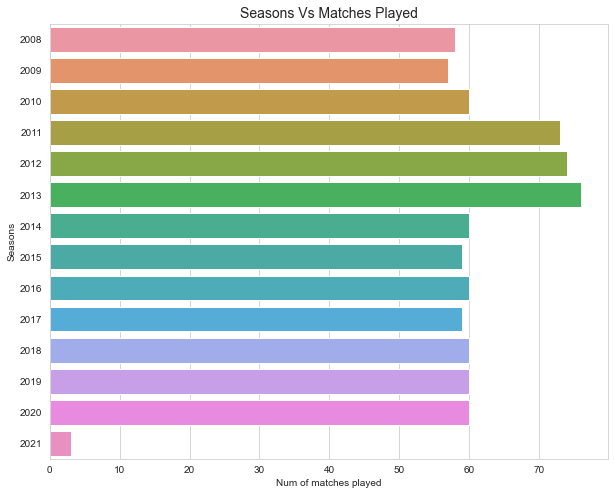

In [16]:
# Let's visualize this info.
plt.figure(figsize = (10, 8))
sns.barplot(y = data.index, x = data, orient = 'h')
plt.ylabel('Seasons')
plt.xlabel('Num of matches played')
plt.title('Seasons Vs Matches Played', fontsize = 14)

It's clear from this visulization that, during the seasons **2011-2013**, maximum number of matches were played. Also, the visualization suggests that we have incomplete data for season 2021.

**5. Mention the names of all the team franchise played in the IPL.**

In [17]:
ipl_data1.batting_team.unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Deccan Chargers', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Gujarat Lions', 'Delhi Capitals'],
      dtype=object)

In [18]:
ipl_data1.batting_team.nunique()

14

In the updated list of teams, the name of team 'Delhi Daredevils' has been changed to 'Delhi Capitals' and 'Pune Warriors' to 'Rising Pune Supergiants'.

**6. Which team has played the most number of matches in the IPL history?**

Text(0, 0.5, 'Teams')

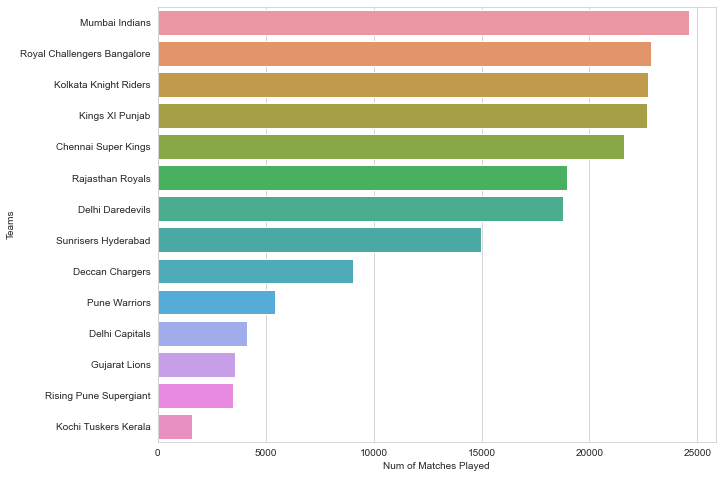

In [19]:
plt.figure(figsize = (10, 8))
data = ipl_data1.batting_team.value_counts().sort_values(ascending = False)
sns.barplot(y = data.index, x = data, orient = 'h')
plt.xlabel('Num of Matches Played')
plt.ylabel('Teams')

Mumbai Indians have played the most number of matches in the IPL history. Interestingly, this result can also have influence on the highest number of matches won by any team or vice-versa. Let's check.

We will use the *match_data* dataset to check this result.

**7. Which teams have won the most number of matches?**

In [20]:
match_data['winner'].value_counts()

Mumbai Indians                 92
Chennai Super Kings            79
Kolkata Knight Riders          77
Royal Challengers Bangalore    73
Kings XI Punjab                70
Rajasthan Royals               63
Delhi Daredevils               62
Sunrisers Hyderabad            42
Deccan Chargers                29
Gujarat Lions                  13
Pune Warriors                  12
Rising Pune Supergiant         10
Kochi Tuskers Kerala            6
Rising Pune Supergiants         5
Name: winner, dtype: int64

Yes, we were right with our assumption. But one think to note here is that, match_data has data ranging between seasons 2008-2016. So, the assumption in this case is not 100% valid.

### Toss Analysis:-

We will be using the match_data dataset in this section.

In [21]:
match_data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

**8. Which team has won the most number of tosses?**

In [22]:
match_data['toss_winner'].value_counts()

Mumbai Indians                 85
Kolkata Knight Riders          78
Delhi Daredevils               72
Royal Challengers Bangalore    70
Kings XI Punjab                68
Chennai Super Kings            66
Rajasthan Royals               63
Deccan Chargers                43
Sunrisers Hyderabad            35
Pune Warriors                  20
Gujarat Lions                  15
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

There seems to be some type of relation between the number of matches played by a team and the number of tosses won. Its suprising because both these variables are independent of each other.

Mumbai Indians, Kolkata Knight Riders and Royal Challengers Bangalore have played the most number of matches. Also they have won the most number of tosses. Delhi Capitals in this case are ahead of RCB, thanks to Virat Kohli's luck during tosses(Lost most of the tosses as a captain).

**9. What is the most preferred choice by the captains after winning the toss?**

<AxesSubplot:xlabel='toss_decision', ylabel='count'>

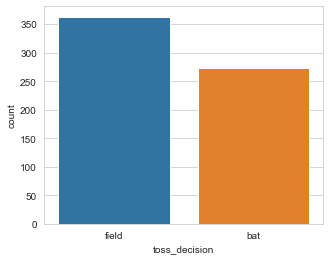

In [23]:
plt.figure(figsize = (5,4))
sns.countplot(match_data.toss_decision)

The data suggests had teams are comfortable chasing in most of the cases after winning the toss.

**10. What is the percentage of matches won by teams batting 1st?**

In [24]:
win_by_batting_1st = match_data[match_data["win_by_runs"] != 0]
len(win_by_batting_1st)

287

In [25]:
batting_1st_win_percent = len(win_by_batting_1st) / len(match_data) * 100
print(f"The percentage of matches won by teams batting 1st is {round(batting_1st_win_percent, 2)} %")

The percentage of matches won by teams batting 1st is 45.13 %


**11. What is the percentage of matches won by teams batting 2nd?**

In [26]:
win_by_batting_2nd = match_data[match_data["win_by_wickets"] != 0]
len(win_by_batting_2nd)

339

In [27]:
batting_2nd_win_percent = len(win_by_batting_2nd) / len(match_data) * 100
print(f"The percentage of matches won by teams batting 2nd is {round(batting_2nd_win_percent, 2)} %")

The percentage of matches won by teams batting 2nd is 53.3 %


**12. Which team has converted most toss wins to match wins?**

To understand the results of this question, we will be creating a dataframe having relevant information.

In [28]:
# Total number of matches were teams won the toss and also the match.
toss_and_match_won = match_data[match_data['toss_winner'] == match_data['winner']]['winner'].value_counts()
toss_and_match_won

Mumbai Indians                 48
Kolkata Knight Riders          44
Chennai Super Kings            42
Royal Challengers Bangalore    35
Rajasthan Royals               34
Delhi Daredevils               33
Kings XI Punjab                28
Deccan Chargers                19
Sunrisers Hyderabad            17
Gujarat Lions                  10
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Pune Warriors                   3
Rising Pune Supergiants         3
Name: winner, dtype: int64

In [29]:
# Total toss wins by teams.
total_toss_wins_by_teams = match_data['toss_winner'].value_counts()
total_toss_wins_by_teams

Mumbai Indians                 85
Kolkata Knight Riders          78
Delhi Daredevils               72
Royal Challengers Bangalore    70
Kings XI Punjab                68
Chennai Super Kings            66
Rajasthan Royals               63
Deccan Chargers                43
Sunrisers Hyderabad            35
Pune Warriors                  20
Gujarat Lions                  15
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

In [30]:
toss_and_match_won = pd.DataFrame(toss_and_match_won.values, index = toss_and_match_won.index, columns = ['Match Wins'])
total_toss_wins_by_teams = pd.DataFrame(total_toss_wins_by_teams.values, index = total_toss_wins_by_teams.index, columns = ['Total Toss Wins'])

In [31]:
# Creating a new column that holds the percentage of toss wins to match wins.
toss_wins_to_match_wins_percent = total_toss_wins_by_teams.join(toss_and_match_won)
toss_wins_to_match_wins_percent['toss_and_match_win_percent'] = toss_wins_to_match_wins_percent['Match Wins'] / toss_wins_to_match_wins_percent['Total Toss Wins'] * 100

In [32]:
toss_wins_to_match_wins_percent

,Total Toss Wins,Match Wins,toss_and_match_win_percent
Mumbai Indians,85,48,56.470588
Kolkata Knight Riders,78,44,56.410256
Delhi Daredevils,72,33,45.833333
Royal Challengers Bangalore,70,35,50.000000
Kings XI Punjab,68,28,41.176471
Chennai Super Kings,66,42,63.636364
Rajasthan Royals,63,34,53.968254
Deccan Chargers,43,19,44.186047
Sunrisers Hyderabad,35,17,48.571429
Pune Warriors,20,3,15.000000


### Batting Analysis:-

We will use the *ipl_data1* dataset in this section

**13. Which teams have scored the most number of runs in IPL?**

In [33]:
ipl_data1.groupby(['batting_team'])['run'].sum().sort_values(ascending=False)

batting_team
Mumbai Indians                 32488
Royal Challengers Bangalore    30415
Kings XI Punjab                30064
Kolkata Knight Riders          29606
Chennai Super Kings            28560
Rajasthan Royals               24542
Delhi Daredevils               24296
Sunrisers Hyderabad            19539
Deccan Chargers                11463
Pune Warriors                   6358
Delhi Capitals                  5499
Gujarat Lions                   4862
Rising Pune Supergiant          4533
Kochi Tuskers Kerala            1901
Name: run, dtype: int64

**14. What is the average powerplay score by the teams?**

Before we move ahead, we would like to replace 'Delhi Daredevils' with 'Delhi Capitals' and 'Pune Warriors' with 'Rising Pune Supergiant'.

In [34]:
ipl_data1['batting_team'].replace({'Delhi Daredevils' : 'Delhi Capitals', 'Pune Warriors' : 'Rising Pune Supergiant'}, inplace = True)

In [35]:
ipl_data1[ipl_data1['over'] < 6].groupby(['match_id', 'batting_team']).sum()['run'].groupby('batting_team').mean().sort_values(ascending = False)[2:]

batting_team
Sunrisers Hyderabad            47.856000
Kings XI Punjab                47.126316
Kolkata Knight Riders          46.409326
Delhi Capitals                 46.143590
Deccan Chargers                45.560000
Mumbai Indians                 45.529412
Chennai Super Kings            45.195531
Rajasthan Royals               44.912500
Royal Challengers Bangalore    44.826531
Rising Pune Supergiant         44.240000
Name: run, dtype: float64

The replacement step performed above is curious to answer this question. If not then 'Delhi Capitals' would have top this list, which would be a misleading conclusion.

**15. Mention the list of Top 5 highest team scores in IPL.**

In [36]:
ipl_data1.groupby(['start_date','batting_team']).sum()['run'].droplevel(level=0).sort_values(ascending=False)[:5]

batting_team
Royal Challengers Bangalore    263
Royal Challengers Bangalore    248
Chennai Super Kings            246
Kolkata Knight Riders          245
Chennai Super Kings            240
Name: run, dtype: int64

**16. Which batsman has scored the most number of runs in the IPL history?**

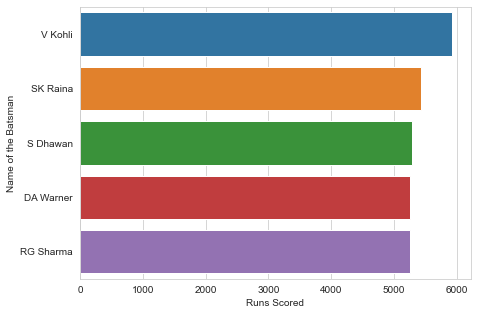

In [37]:
plt.figure(figsize = (7, 5))
most_runs_data = ipl_data1.groupby(['striker'])['runs_off_bat'].sum().sort_values(ascending = False)
first_5 = most_runs_data[:5]
sns.barplot(y = first_5.index, x = first_5, orient= 'h')
plt.xlabel('Runs Scored')
plt.ylabel('Name of the Batsman')
plt.show()

King Kohli has scored the most number of runs in IPL with close to 6000 runs. Followed him is Suresh Raina and the Gabbar, Shikhar Dhawan.

**17. Which batsman has scored the most number of centuries in IPL?**

In [38]:
runs = ipl_data1.groupby(['striker','match_id'])['runs_off_bat'].sum()
runs[runs >= 100].droplevel(level=1).groupby('striker').count().sort_values(ascending=False)[:10]

striker
CH Gayle          6
V Kohli           5
DA Warner         4
SR Watson         4
AB de Villiers    3
HM Amla           2
M Vijay           2
KL Rahul          2
SV Samson         2
S Dhawan          2
Name: runs_off_bat, dtype: int64

**18. Which batsman as scored the most number of fifties in the IPL?**

Text(0, 0.5, 'Batsman')

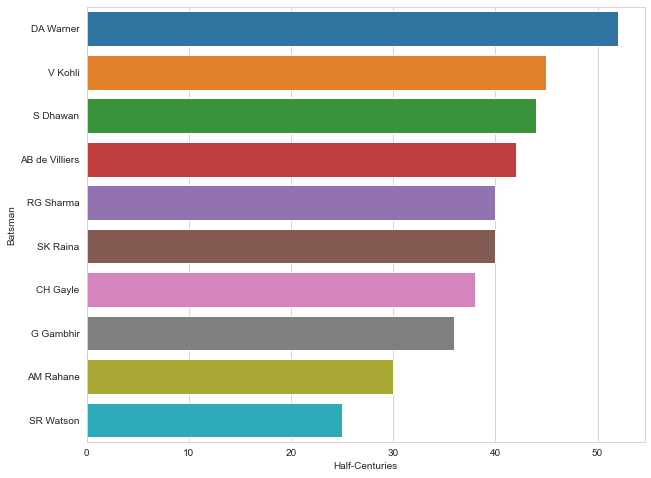

In [39]:
plt.figure(figsize=(10,8))
runs = ipl_data1.groupby(['striker','start_date'])['runs_off_bat'].sum()
data = runs[runs >= 50].droplevel(level=1).groupby('striker').count().sort_values(ascending=False)[:10]
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Half-Centuries')
plt.ylabel('Batsman')

David Warner have perform marvolusly well when talking about the number of fifties. Second in the list is the run-machine, King Kohli.

**19. Which batsman has scored the highest individual score in IPL?**

In [40]:
ipl_data1.groupby(['striker','start_date'])['runs_off_bat'].sum().sort_values(ascending=False)[:10]

striker         start_date
CH Gayle        2013-04-23    175
BB McCullum     2008-04-18    158
AB de Villiers  2015-05-10    133
KL Rahul        2020-09-24    132
AB de Villiers  2016-05-14    129
CH Gayle        2012-05-17    128
RR Pant         2018-05-10    128
M Vijay         2010-04-03    127
DA Warner       2017-04-30    126
V Sehwag        2014-05-30    122
Name: runs_off_bat, dtype: int64

Chris Gayle has been a successful player in IPL, having records for the highest ever individual score in an IPL match, most number of sixes in an inning and most number of sixes in all IPL seasons. He is a destructive player and a nightmare for many indian and overseas bowlers.

**20. Which batsman has scored the most number of 6's in IPL?**

Text(0, 0.5, 'Name of the batsman')

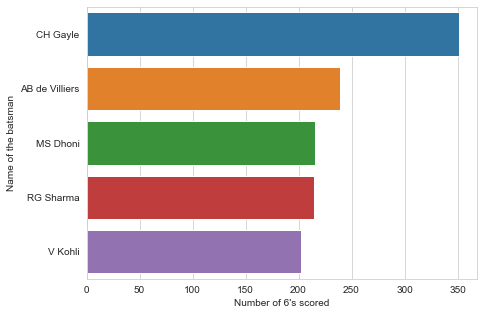

In [41]:
plt.figure(figsize = (7,5))
most_6 = ipl_data1[ipl_data1['runs_off_bat'] == 6]['striker'].value_counts()
first_5 = most_6[:5]
sns.barplot(y = first_5.index, x = first_5, orient = 'h')
plt.xlabel("Number of 6's scored")
plt.ylabel("Name of the batsman")

**21. List of Top 10 batsmans who have hit the most number of sixes in an inning.**

In [42]:
ipl_data1[ipl_data1['runs_off_bat'] == 6].groupby(['start_date','striker']).count()['season'].sort_values(ascending=False).droplevel(level=0)[:10]

striker
CH Gayle          17
BB McCullum       13
CH Gayle          13
CH Gayle          12
AB de Villiers    12
M Vijay           11
CH Gayle          11
AD Russell        11
ST Jayasuriya     11
SS Iyer           10
Name: season, dtype: int64

Chris Gayle is a true legend and a hard hitting batsman. Second in this list is Brendon McCullum, thanks to his knock of 158 against RCB in the first ever IPL match.

**22. Which player has scored the most number of 4's in IPL?**

Text(0, 0.5, 'Name of the batsman')

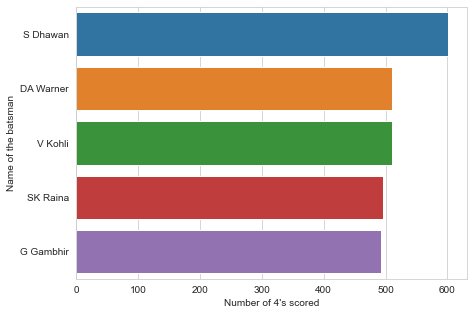

In [43]:
plt.figure(figsize = (7,5))
most_4 = ipl_data1[ipl_data1['runs_off_bat'] == 4]['striker'].value_counts()
first_5 = most_4[:5]
sns.barplot(y = first_5.index, x = first_5, orient = 'h')
plt.xlabel("Number of 4's scored")
plt.ylabel("Name of the batsman")

The Gabbar, Shikhar Dhawan is a master player for his ability to find the gaps between the field.

**23. Top 5 players who have hit the most number of 4's in an inning.**

In [44]:
ipl_data1[ipl_data1['runs_off_bat'] == 4].groupby(['start_date','striker']).count()['season'].sort_values(ascending=False).droplevel(level=0)[:5]

striker
PC Valthaty       19
AB de Villiers    19
MJ Lumb           16
AM Rahane         16
GJ Maxwell        15
Name: season, dtype: int64

Paul Valthaty and AB de Villiers have top this list with almost 80 runs coming from just 4's.

### Calculating batsman's performance metrics:-

Now we will work on creating a dataframe that will summarize all the important metrics based on which a batsman's performance is calculated.

The dataframe will have information on the following things:-

1. Total runs scored by batsman
2. Total number of 4's scored
3. Total number of 6's scored
4. Percentage of runs scored only by boundaries
5. Total number of balls faced
6. Total number of matches played
7. Total number of runs scored without boundary
8. Average strike rate of the batsman from all the matches
9. Average number of runs scored in each match
10. Total number of dot balls faced
11. Percentage of dot balls based on the total number of balls faced

**Note:-** We will keep on adding results from all the steps to create a final dataframe.

In [45]:
# Step 1:- Creating a dataframe using 3 different dataframes that stores a batsman's 'total runs', "total 4's scored" and "total 6's scored".

In [46]:
most_runs_data.head()

striker
V Kohli      5921
SK Raina     5430
S Dhawan     5282
DA Warner    5257
RG Sharma    5251
Name: runs_off_bat, dtype: int64

In [47]:
most_4.head()

S Dhawan     601
DA Warner    510
V Kohli      510
SK Raina     496
G Gambhir    492
Name: striker, dtype: int64

In [48]:
most_6.head()

CH Gayle          351
AB de Villiers    239
MS Dhoni          216
RG Sharma         215
V Kohli           202
Name: striker, dtype: int64

In [49]:
# Creating a dataframe that will hold the info on the total number of 6's hit by each batsmans.
li = []
for i in range(len(most_6)):
    li.append(most_6[i])

In [50]:
most_6 = pd.DataFrame(li, index = most_6.index, columns = ["6's count"])
most_6.head()

,6's count
CH Gayle,351
AB de Villiers,239
MS Dhoni,216
RG Sharma,215
V Kohli,202


In [51]:
# Creating a dataframe that will hold the info on the total number of 4's hit by each batsmans.
li_2 = []
for i in range(len(most_4)):
    li_2.append(most_4[i])
    
most_4 = pd.DataFrame(li_2, index = most_4.index, columns = ["4's count"])
most_4.head()

,4's count
S Dhawan,601
DA Warner,510
V Kohli,510
SK Raina,496
G Gambhir,492


In [52]:
# Creating a dataframe that will have the info of the total number of boundaries scored by a batsman.
boundary = most_4.join(most_6)

In [53]:
boundary.head()

,4's count,6's count
S Dhawan,601,111.0
DA Warner,510,195.0
V Kohli,510,202.0
SK Raina,496,199.0
G Gambhir,492,59.0


In [54]:
# Creating a dataframe which stores the total num of runs scored by the batsmans.
runs = []
for run in range(len(most_runs_data)):
    runs.append(most_runs_data[run])
    
most_runs = pd.DataFrame(runs, most_runs_data.index, columns = ["Total runs"])

In [55]:
most_runs.head()

,Total runs
striker,
V Kohli,5921
SK Raina,5430
S Dhawan,5282
DA Warner,5257
RG Sharma,5251


In [56]:
# Joining all the three dataframes to construct a single dataframe containing all the infos.
runs_statistics = most_runs.join(boundary)

In [57]:
runs_statistics.head()

,Total runs,4's count,6's count
striker,,,
V Kohli,5921,510.0,202.0
SK Raina,5430,496.0,199.0
S Dhawan,5282,601.0,111.0
DA Warner,5257,510.0,195.0
RG Sharma,5251,459.0,215.0


In [58]:
runs_statistics.isnull().sum()

Total runs      0
4's count     115
6's count     204
dtype: int64

We have some missing values for the number of 4's and 6's scored by a batsman. The possible reason could be that they are lower order batsmans (bowlers).

In [59]:
# Replacing NaN values with 0.
runs_statistics.replace({np.nan:0}, inplace = True)

In [60]:
runs_statistics.isnull().sum()

Total runs    0
4's count     0
6's count     0
dtype: int64

In [61]:
# Step 2 :- Calculating the percentage of runs scored in boundaries and storing the info in a new column.
runs_statistics["percent_runs_scored_by_boundarys"] = (runs_statistics["4's count"]*4 + runs_statistics["6's count"]*6)/runs_statistics['Total runs'] * 100

In [62]:
runs_statistics.head(3)

,Total runs,4's count,6's count,percent_runs_scored_by_boundarys
striker,,,,
V Kohli,5921,510.0,202.0,54.923155
SK Raina,5430,496.0,199.0,58.526703
S Dhawan,5282,601.0,111.0,58.121924


In [63]:
# Step 3 :- Calculating the total number of balls faced by a batsman.
total_balls_faced = ipl_data1.groupby(['match_id', 'striker'])['runs_off_bat'].count().groupby('striker').sum()
top_5 = total_balls_faced.sort_values(ascending = False)[:5]  # Top 5 batsman based on the num of balls faced.

In [64]:
top_5

striker
V Kohli      4642
S Dhawan     4263
RG Sharma    4106
SK Raina     4080
DA Warner    3825
Name: runs_off_bat, dtype: int64

In [65]:
# Creating a dataframe of the above info about total balls faced.
balls_list = []
for i in range(len(total_balls_faced)):
    balls_list.append(total_balls_faced[i])
    
total_balls_faced = pd.DataFrame(balls_list, index=total_balls_faced.index, columns = ['Balls Faced'])
total_balls_faced[:5]

,Balls Faced
striker,
A Ashish Reddy,196
A Chandila,7
A Chopra,75
A Choudhary,20
A Dananjaya,5


In [66]:
# Joining the dataframes.
runs_statistics = runs_statistics.join(total_balls_faced)

In [67]:
runs_statistics.head()

,Total runs,4's count,6's count,percent_runs_scored_by_boundarys,Balls Faced
striker,,,,,
V Kohli,5921,510.0,202.0,54.923155,4642
SK Raina,5430,496.0,199.0,58.526703,4080
S Dhawan,5282,601.0,111.0,58.121924,4263
DA Warner,5257,510.0,195.0,61.061442,3825
RG Sharma,5251,459.0,215.0,59.531518,4106


In [68]:
# Step 4:- Calculating the total number of matches played by each batsman.
total_matches_played = ipl_data1.groupby(['match_id', 'striker'])['striker'].count().groupby('striker').count()
top_10 = total_matches_played.sort_values(ascending = False)[:10]

In [69]:
total_matches_played[:5]

striker
A Ashish Reddy    23
A Chandila         2
A Chopra           6
A Choudhary        3
A Dananjaya        1
Name: striker, dtype: int64

In [70]:
# Creating a dataframe of total num of matches played by a player.
match_list = []
for i in range(len(total_matches_played)):
    match_list.append(total_matches_played[i])
    
total_match = pd.DataFrame(match_list, index = total_matches_played.index, columns = ['Matches Played'])
total_match.head()

,Matches Played
striker,
A Ashish Reddy,23
A Chandila,2
A Chopra,6
A Choudhary,3
A Dananjaya,1


In [71]:
# Joining the dataframes.
runs_statistics = runs_statistics.join(total_match)

In [72]:
runs_statistics.head()

,Total runs,4's count,6's count,percent_runs_scored_by_boundarys,Balls Faced,Matches Played
striker,,,,,,
V Kohli,5921,510.0,202.0,54.923155,4642,185
SK Raina,5430,496.0,199.0,58.526703,4080,190
S Dhawan,5282,601.0,111.0,58.121924,4263,176
DA Warner,5257,510.0,195.0,61.061442,3825,143
RG Sharma,5251,459.0,215.0,59.531518,4106,195


In [73]:
# Step 5:- Calculating the total number of runs scored without boundaries by the batsmans.
runs_statistics['runs_without_boundary'] = runs_statistics['Total runs'] - (runs_statistics["4's count"]*4 + runs_statistics["6's count"]*6)

In [74]:
top_5 = runs_statistics["runs_without_boundary"].sort_values(ascending = False)[:5]
top_5

striker
V Kohli      2669.0
SK Raina     2252.0
S Dhawan     2212.0
RG Sharma    2125.0
MS Dhoni     2084.0
Name: runs_without_boundary, dtype: float64

In [75]:
# Step 5:- Calculating the average strike rate of batsman's from all the matches.
data = ipl_data1.groupby(['match_id', 'striker'])['runs_off_bat'].sum() / ipl_data1.groupby(['match_id', 'striker'])['runs_off_bat'].count()*100
strike_rate = data.groupby('striker').mean()
strike_rate[0]     # 1st row of strike rate.

135.39039462952505

In [76]:
# Creating a dataframe for Average Strike rates of batsmans.
strike_rates = []
for i in range(len(strike_rate)):
    strike_rates.append(strike_rate[i])
    
avg_strike_rate = pd.DataFrame(strike_rates, index = strike_rate.index, columns = ['Avg_Strike_rate'])
avg_strike_rate[:5]

,Avg_Strike_rate
striker,
A Ashish Reddy,135.390395
A Chandila,33.333333
A Chopra,59.148148
A Choudhary,163.888889
A Dananjaya,80.000000


In [77]:
# Joining the dataframes.
runs_statistics = runs_statistics.join(avg_strike_rate)

In [78]:
runs_statistics.head(3)

,Total runs,4's count,6's count,percent_runs_scored_by_boundarys,Balls Faced,Matches Played,runs_without_boundary,Avg_Strike_rate
striker,,,,,,,,
V Kohli,5921,510.0,202.0,54.923155,4642,185,2669.0,115.032582
SK Raina,5430,496.0,199.0,58.526703,4080,190,2252.0,116.065665
S Dhawan,5282,601.0,111.0,58.121924,4263,176,2212.0,108.596076


In [79]:
# Step 6:- Calculating the average runs scored by the batsman in each match
runs_statistics['Avg_runs_per_match'] = np.round(runs_statistics['Total runs'] / runs_statistics['Matches Played'], 2)
runs_statistics.head()

,Total runs,4's count,6's count,percent_runs_scored_by_boundarys,Balls Faced,Matches Played,runs_without_boundary,Avg_Strike_rate,Avg_runs_per_match
striker,,,,,,,,,
V Kohli,5921,510.0,202.0,54.923155,4642,185,2669.0,115.032582,32.01
SK Raina,5430,496.0,199.0,58.526703,4080,190,2252.0,116.065665,28.58
S Dhawan,5282,601.0,111.0,58.121924,4263,176,2212.0,108.596076,30.01
DA Warner,5257,510.0,195.0,61.061442,3825,143,2047.0,119.313344,36.76
RG Sharma,5251,459.0,215.0,59.531518,4106,195,2125.0,110.135169,26.93


In [80]:
# Step 7:- Calculating the total number of dot balls faced by a batsman
dot_balls = ipl_data1[ipl_data1['runs_off_bat'] == 0].groupby(['striker']).count()['ball']
top5 = ipl_data1[ipl_data1['runs_off_bat'] == 0].groupby(['striker']).count()['ball'].sort_values(ascending = False)[:5]

In [81]:
top5

striker
V Kohli       1637
S Dhawan      1626
CH Gayle      1562
RG Sharma     1540
RV Uthappa    1480
Name: ball, dtype: int64

In [82]:
# Creating a dataframe of total dot balls to batsman.
dots = []
for i in range(len(dot_balls)):
    dots.append(dot_balls[i])
    
dot_balls_faced = pd.DataFrame(dots, index = dot_balls.index, columns = ['dot_balls_faced'])

In [83]:
dot_balls_faced.head()

,dot_balls_faced
striker,
A Ashish Reddy,61
A Chandila,3
A Chopra,45
A Choudhary,4
A Dananjaya,2


In [84]:
runs_statistics = runs_statistics.join(dot_balls_faced)

In [85]:
runs_statistics.sample(3)    # Show any 3 random rows from the dataframe.

,Total runs,4's count,6's count,percent_runs_scored_by_boundarys,Balls Faced,Matches Played,runs_without_boundary,Avg_Strike_rate,Avg_runs_per_match,dot_balls_faced
striker,,,,,,,,,,
S Tyagi,3,0.0,0.0,0.000000,4,1,3.0,75.000000,3.00,1.0
DA Miller,1850,126.0,87.0,55.459459,1375,77,824.0,121.069867,24.03,466.0
DP Vijaykumar,1,0.0,0.0,0.000000,1,1,1.0,100.000000,1.00,NaN


In [86]:
# Step 8 :- Creating a column for dot ball percentage based on total balls faced by the batsman.
runs_statistics['dot_balls_percent'] = runs_statistics['dot_balls_faced'] / runs_statistics['Balls Faced'] * 100
runs_statistics.head()

,Total runs,4's count,6's count,percent_runs_scored_by_boundarys,Balls Faced,Matches Played,runs_without_boundary,Avg_Strike_rate,Avg_runs_per_match,dot_balls_faced,dot_balls_percent
striker,,,,,,,,,,,
V Kohli,5921,510.0,202.0,54.923155,4642,185,2669.0,115.032582,32.01,1637.0,35.264972
SK Raina,5430,496.0,199.0,58.526703,4080,190,2252.0,116.065665,28.58,1426.0,34.950980
S Dhawan,5282,601.0,111.0,58.121924,4263,176,2212.0,108.596076,30.01,1626.0,38.142153
DA Warner,5257,510.0,195.0,61.061442,3825,143,2047.0,119.313344,36.76,1433.0,37.464052
RG Sharma,5251,459.0,215.0,59.531518,4106,195,2125.0,110.135169,26.93,1540.0,37.506089


In [87]:
# Making a copy of the above dataframe
batting_statistics = runs_statistics.copy()

**21. Among all the batsmans that have played more than 1000 balls, which top 10 batsmans have the highest boundary percentage?**

We will make use of the newly created dataframe to answer this question.

In [88]:
batting_statistics[batting_statistics['Balls Faced'] > 1000]['percent_runs_scored_by_boundarys'].sort_values(ascending=False)[:10]

striker
CH Gayle        76.061615
AC Gilchrist    72.885452
V Sehwag        72.287390
DR Smith        70.524109
SR Watson       68.247423
BB McCullum     67.730743
GJ Maxwell      67.702265
N Rana          65.919578
JC Buttler      65.889213
KA Pollard      65.270049
Name: percent_runs_scored_by_boundarys, dtype: float64

**24. Among all the batsmans that have played more than 1000 balls, which top 10 batsmans have the highest average (runs)?**

In [89]:
batting_statistics[batting_statistics['Balls Faced'] > 1000]['Avg_runs_per_match'].sort_values(ascending=False)[:10]

striker
KL Rahul          36.85
DA Warner         36.76
CH Gayle          36.67
SE Marsh          36.07
MEK Hussey        34.09
V Kohli           32.01
AB de Villiers    31.31
KS Williamson     31.13
RR Pant           30.46
JC Buttler        30.09
Name: Avg_runs_per_match, dtype: float64

**25. Among all the batsmans that have played more than 1000 balls, which top 10 batsmans have the highest average strike rates?**

In [90]:
batting_statistics[batting_statistics['Balls Faced'] > 1000]['Avg_Strike_rate'].sort_values(ascending=False)[:10]

striker
JC Buttler        134.086613
KA Pollard        131.561776
AB de Villiers    130.278725
SA Yadav          129.799186
V Sehwag          128.684097
CH Gayle          125.711819
DJ Bravo          125.688441
RR Pant           125.036073
KL Rahul          123.607593
RA Jadeja         123.589345
Name: Avg_Strike_rate, dtype: float64

**26. Among all the batsmans that have played more than 2000 balls, which top 10 batsmans have the lowest dot ball percentage?**

In [91]:
batting_statistics[batting_statistics['Balls Faced'] > 2000]['dot_balls_percent'].sort_values(ascending=True)[:10]

striker
AB de Villiers    31.736890
SK Raina          34.950980
MS Dhoni          35.107296
V Kohli           35.264972
AT Rayudu         36.001340
KD Karthik        36.231884
YK Pathan         37.360754
DA Warner         37.464052
RG Sharma         37.506089
MK Pandey         37.668320
Name: dot_balls_percent, dtype: float64

**27. Which batsman has scored the most number of runs in 1's, 2's or 3's?**

In [92]:
batting_statistics['runs_without_boundary'].sort_values(ascending=False)[:1]

striker
V Kohli    2669.0
Name: runs_without_boundary, dtype: float64

Virat Kolhi is known as one of the finest runners between the wickets. This skill has help him to rotate strikes during difficult times of building a partnership.

### Analyzing the final death overs (16-20):-

In this section we are going to analyze the final 4 overs of the innings based on batting performances.

The approach is similar to what we have seen above, creating a dataframe for the overall comparison of the player.

In [93]:
# Data for the final 4 overs of the matches.
final_4_overs = ipl_data1[ipl_data1['ball'] > 16]

In [94]:
# Total runs scored by batsmans in the final 4 overs of the matches.
total_runs_final_4 = final_4_overs.groupby(['striker'])['runs_off_bat'].sum().sort_values(ascending = False)

In [95]:
total_runs_final_4.head()

striker
MS Dhoni          2303
KA Pollard        1494
AB de Villiers    1284
RG Sharma         1144
V Kohli            968
Name: runs_off_bat, dtype: int64

In [96]:
# Creating a dataframe which stores the total num of runs scored by the batsmans in final 4 overs.
runs = []
for run in range(len(total_runs_final_4)):
    runs.append(total_runs_final_4[run])
    
total_runs_in_4 = pd.DataFrame(runs, total_runs_final_4.index, columns = ["Total runs"])

In [97]:
total_runs_in_4.head()

,Total runs
striker,
MS Dhoni,2303
KA Pollard,1494
AB de Villiers,1284
RG Sharma,1144
V Kohli,968


In [98]:
# Total number of balls faced by batsman in the final 4 overs.
total_balls_faced_in_4 = final_4_overs.groupby(['match_id', 'striker'])['runs_off_bat'].count().groupby('striker').sum()
total_balls_faced_in_4.sort_values(ascending = False)[:5]

striker
MS Dhoni          1275
KA Pollard         851
RA Jadeja          632
RG Sharma          601
AB de Villiers     572
Name: runs_off_bat, dtype: int64

In [99]:
# Creating a dataframe of the above info about total balls faced in final 4 overs.
balls_list = []
for i in range(len(total_balls_faced_in_4)):
    balls_list.append(total_balls_faced_in_4[i])
    
total_balls_faced_in_4 = pd.DataFrame(balls_list, index=total_balls_faced_in_4.index, columns = ['Balls Faced'])
total_balls_faced_in_4[:5]

,Balls Faced
striker,
A Ashish Reddy,129
A Chandila,7
A Choudhary,19
A Dananjaya,5
A Flintoff,14


In [100]:
# Strike rates of batsmans in the final 4 overs.
strike_rate_in_4 = final_4_overs.groupby(['match_id', 'striker'])['runs_off_bat'].sum() / final_4_overs.groupby(['match_id', 'striker'])['runs_off_bat'].count()*100
strike_rate_in_4 = strike_rate_in_4.groupby('striker').mean()

In [101]:
strike_rate_in_4.sort_values(ascending = False)[:5]

striker
JPR Scantlebury-Searles    320.000000
PA Reddy                   300.000000
Misbah-ul-Haq              266.666667
BJ Rohrer                  264.587047
B Stanlake                 250.000000
Name: runs_off_bat, dtype: float64

In [102]:
# Creating a dataframe for Average Strike rates of batsmans in the final 4 overs.
strike_rates = []
for i in range(len(strike_rate_in_4)):
    strike_rates.append(strike_rate_in_4[i])
    
avg_strike_rate_in_4 = pd.DataFrame(strike_rates, index = strike_rate_in_4.index, columns = ['Avg_Strike_rate'])
avg_strike_rate_in_4[:5]

,Avg_Strike_rate
striker,
A Ashish Reddy,132.134503
A Chandila,33.333333
A Choudhary,164.646465
A Dananjaya,80.000000
A Flintoff,157.142857


In [103]:
avg_strike_rate_in_4.isnull().sum()

Avg_Strike_rate    0
dtype: int64

In [104]:
# Creating a dataframe by joining the above three dataframes.
final_4_overs_record = total_runs_in_4.join(total_balls_faced_in_4)

In [105]:
final_4_overs_record = final_4_overs_record.join(avg_strike_rate_in_4)

In [106]:
final_4_overs_record.head()

,Total runs,Balls Faced,Avg_Strike_rate
striker,,,
MS Dhoni,2303,1275,162.648677
KA Pollard,1494,851,158.195579
AB de Villiers,1284,572,207.525009
RG Sharma,1144,601,159.081131
V Kohli,968,491,172.070080


In [107]:
# Calculating the boundary percentage of the batsmans in the final 4 overs.

In [108]:
num_of_4 = final_4_overs[final_4_overs['runs_off_bat'] == 4]['striker'].value_counts()
num_of_4.head()

MS Dhoni          170
KA Pollard         98
AB de Villiers     96
KD Karthik         92
RG Sharma          90
Name: striker, dtype: int64

In [109]:
num_of_6 = final_4_overs[final_4_overs['runs_off_bat'] == 6]['striker'].value_counts()
num_of_6.head()

MS Dhoni          141
KA Pollard        111
AB de Villiers    100
RG Sharma          78
HH Pandya          66
Name: striker, dtype: int64

In [110]:
# Creating a dataframe that will hold the info on the total number of 6's hit by batsmans in final 4 overs.
li = []
for i in range(len(num_of_6)):
    li.append(num_of_6[i])
    
num_of_6 = pd.DataFrame(li, index = num_of_6.index, columns = ["6's count"])
num_of_6.head()

,6's count
MS Dhoni,141
KA Pollard,111
AB de Villiers,100
RG Sharma,78
HH Pandya,66


In [111]:
# Creating a dataframe that will hold the info on the total number of 4's hit by batsmans in final 4 overs.
li = []
for i in range(len(num_of_4)):
    li.append(num_of_4[i])
    
num_of_4 = pd.DataFrame(li, index = num_of_4.index, columns = ["4's count"])
num_of_4.head()

,4's count
MS Dhoni,170
KA Pollard,98
AB de Villiers,96
KD Karthik,92
RG Sharma,90


In [112]:
final_4_overs_record = final_4_overs_record.join(num_of_4)
final_4_overs_record = final_4_overs_record.join(num_of_6)

In [113]:
final_4_overs_record["percent_runs_scored_by_boundarys"] = (final_4_overs_record["4's count"]*4 + final_4_overs_record["6's count"]*6)/final_4_overs_record['Total runs'] * 100

In [114]:
final_4_overs_record.head()

,Total runs,Balls Faced,Avg_Strike_rate,4's count,6's count,percent_runs_scored_by_boundarys
striker,,,,,,
MS Dhoni,2303,1275,162.648677,170.0,141.0,66.261398
KA Pollard,1494,851,158.195579,98.0,111.0,70.816600
AB de Villiers,1284,572,207.525009,96.0,100.0,76.635514
RG Sharma,1144,601,159.081131,90.0,78.0,72.377622
V Kohli,968,491,172.070080,70.0,63.0,67.975207


**28. Among all the batsmans that have played more than 500 balls, which players have scored the most number of runs in the deaths overs?**

In [115]:
final_4_overs_record[final_4_overs_record['Balls Faced'] > 500]['Total runs'].sort_values(ascending=False)[:5]

striker
MS Dhoni          2303
KA Pollard        1494
AB de Villiers    1284
RG Sharma         1144
KD Karthik         943
Name: Total runs, dtype: int64

**29. Among all the batsman that have played more than 500 balls, which batsmans have the highest Average Strike rates in the death overs?**

In [116]:
final_4_overs_record[final_4_overs_record['Balls Faced'] > 500]['Avg_Strike_rate'].sort_values(ascending=False)[:5]

striker
AB de Villiers    207.525009
MS Dhoni          162.648677
RG Sharma         159.081131
KA Pollard        158.195579
KD Karthik        156.485564
Name: Avg_Strike_rate, dtype: float64

**30. Highest boundary percentage of the top 5 batsmans?**

In [117]:
final_4_overs_record[final_4_overs_record['Balls Faced'] > 500]['percent_runs_scored_by_boundarys'].sort_values(ascending=False)[:5]

striker
AB de Villiers    76.635514
RG Sharma         72.377622
KA Pollard        70.816600
KD Karthik        69.565217
MS Dhoni          66.261398
Name: percent_runs_scored_by_boundarys, dtype: float64

**31. Give the list of Orange cap holders in each season of IPL and also the number of runs scored by them.**

In [118]:
data = ipl_data1.groupby(['season','striker'])['runs_off_bat'].sum().groupby('season').max()
temp_df=pd.DataFrame(ipl_data1.groupby(['season','striker'])['runs_off_bat'].sum())
print("{0:10}{1:20}{2:30}".format("Season","Player","Runs"))
for season,run in data.items():
    player = temp_df.loc[season][temp_df.loc[season]['runs_off_bat'] == run].index[0]
    print(season,'\t ',player,'\t\t',run)

Season    Player              Runs                          
2008 	  SE Marsh 		 616
2009 	  ML Hayden 		 572
2010 	  SR Tendulkar 		 618
2011 	  CH Gayle 		 608
2012 	  CH Gayle 		 733
2013 	  MEK Hussey 		 733
2014 	  RV Uthappa 		 660
2015 	  DA Warner 		 562
2016 	  V Kohli 		 973
2017 	  DA Warner 		 641
2018 	  KS Williamson 		 735
2019 	  DA Warner 		 692
2020 	  KL Rahul 		 676
2021 	  S Dhawan 		 85


**32. Most runs by a batsman in any season of the IPL?**

In [119]:
ipl_data1.groupby(['striker','season'])['runs_off_bat'].sum().sort_values(ascending=False)[:1]

striker  season
V Kohli  2016      973
Name: runs_off_bat, dtype: int64

2016 season was an iconic season for the run machine Virat Kohli, where he hits the most number of runs in any IPL seasons, thanks to his 4 centuries in a row.

### Bowling Statistics:-

**33. List all the 'Purple Cap' holders from different seasons of IPL.**

In [120]:
lst = ['caught','bowled','lbw','stumped','caught and bowled','hit wicket']
data = ipl_data1[ipl_data1['wicket_type'].apply(lambda x: True if x in lst and x != np.nan else False)].groupby(['season','bowler']).count()['ball']
data=data.sort_values(ascending=False)[:30].sort_index(level=0)
val=0
lst=[]
print("{0:10}{1:20}{2:30}".format("Season","Player","Wickets"))
for (season,bowler),wicket in data.items():
    if season == val:
        lst.append(wicket)        
    else:
        print(season,'\t ',bowler,'\t\t',wicket)
        val = season
        lst=[]

Season    Player              Wickets                       
2008 	  Sohail Tanvir 		 22
2009 	  A Kumble 		 21
2011 	  MM Patel 		 22
2012 	  M Morkel 		 25
2013 	  DJ Bravo 		 32
2014 	  MM Sharma 		 23
2015 	  A Nehra 		 22
2016 	  B Kumar 		 23
2017 	  B Kumar 		 26
2018 	  AJ Tye 		 24
2019 	  DL Chahar 		 22
2020 	  A Nortje 		 22


**34. Which bowler has taken the most number of wickets in the IPL?**

In [121]:
lst = ['caught','bowled','lbw','stumped','caught and bowled','hit wicket']
ipl_data1[ipl_data1['wicket_type'].apply(lambda x: True if x in lst and x != ' ' else False)]['bowler'].value_counts()[:1]

SL Malinga    170
Name: bowler, dtype: int64

Lasith Malinga a Sri-Lankan fast bowler has trouble many legendary batsmans with his perfect yorkers. He has taken the most number of wickets in IPL uptill now. Surprisingly, Malinga has never won the Purple Cap for any seasons.

**35. Most maiden overs bowled by a bowler?**

In [122]:
data = ipl_data1.groupby(['start_date', 'bowler', 'over'])['run'].sum()
data = data[data.values == 0].droplevel(level = [0, 2])
data.index.value_counts()[:1]

P Kumar    12
Name: bowler, dtype: int64

Pravin kumar has bowled the most number (12) of maiden overs in the history of IPL.

**36. Which team has taken the most number of wickets in overall seasons of IPL?**

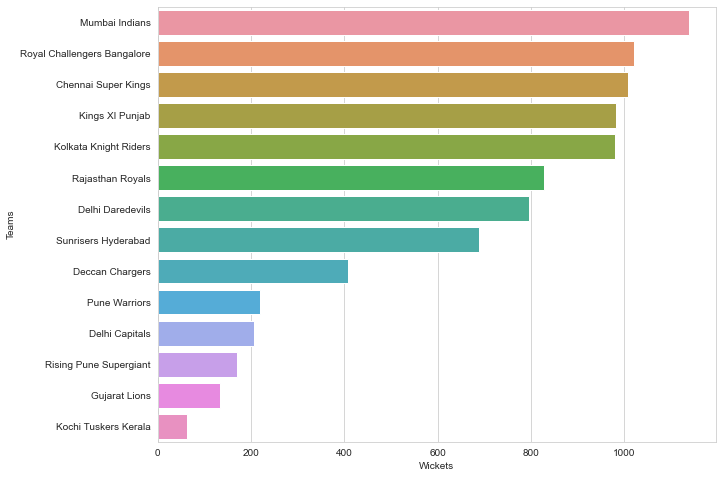

In [123]:
plt.figure(figsize=(10,8))
lst = ['caught','bowled','lbw','stumped','caught and bowled','hit wicket']
data = ipl_data1[ipl_data1['wicket_type'].apply(lambda x: True if x in lst and x != ' ' else False)]['bowling_team'].value_counts()
ipl_data1.groupby(['batting_team'])['extras'].agg('sum').sort_values(ascending=False)
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Wickets')
plt.ylabel('Teams')
plt.show()

**37. Which bowler has bowled the most number of 'No balls' in IPL?**

In [124]:
ipl_data1[ipl_data1['noballs'] != 0]['bowler'].value_counts()[:10]

S Sreesanth    23
JJ Bumrah      23
A Mishra       21
I Sharma       21
UT Yadav       19
SL Malinga     18
AB Dinda       14
JA Morkel      13
M Morkel       13
RP Singh       13
Name: bowler, dtype: int64

We have two best Indian fast bowlers who have bowled the most number of 'No Balls'.

**38. What is the result of an extra ball bowled after a 'No ball'?**

Through this question we would like to know how costly do results of 'no balls' have been in the history of IPL.

In [125]:
no_ball = ipl_data1[ipl_data1['noballs'] == 1].index
no_ball

Int64Index([   239,    693,    738,    886,   1294,   1301,   1313,   1319,
              1391,   1539,
            ...
            191146, 192950, 193037, 193163, 193224, 193659, 193730, 193763,
            193941, 194062],
           dtype='int64', length=758)

In [126]:
new = []
for i in range(len(no_ball)):
    new.append(no_ball[i] + 1)
new

[240,
 694,
 739,
 887,
 1295,
 1302,
 1314,
 1320,
 1392,
 1540,
 1669,
 1740,
 1797,
 1875,
 1967,
 2117,
 2237,
 2302,
 2361,
 2386,
 2483,
 2524,
 2730,
 2872,
 2940,
 3241,
 3277,
 3764,
 3879,
 3946,
 4118,
 4124,
 4135,
 4147,
 4530,
 4531,
 4676,
 4683,
 4862,
 5402,
 5507,
 5617,
 6099,
 6100,
 6380,
 6381,
 6797,
 6825,
 7076,
 7405,
 7451,
 7452,
 7455,
 7539,
 7719,
 7720,
 7750,
 8051,
 8851,
 8899,
 9166,
 9331,
 9343,
 9458,
 9484,
 10357,
 10501,
 10565,
 10973,
 11103,
 11279,
 11339,
 11343,
 11434,
 11463,
 11958,
 12077,
 12403,
 12655,
 13352,
 13434,
 13470,
 13643,
 15085,
 15390,
 15831,
 15958,
 16444,
 16446,
 16544,
 16943,
 17114,
 17510,
 17738,
 17884,
 18114,
 18231,
 18340,
 18749,
 19023,
 19478,
 19745,
 19823,
 19866,
 19921,
 19922,
 20140,
 20565,
 21081,
 21106,
 21352,
 21486,
 21577,
 21801,
 22467,
 22475,
 22640,
 22678,
 22799,
 22800,
 22813,
 22920,
 22941,
 23015,
 23345,
 23816,
 23817,
 23822,
 23834,
 23946,
 24271,
 24273,
 24388,
 2440

In [127]:
after_no_ball = ipl_data1.iloc[new, :]
after_no_ball.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,runs_off_bat,extras,wides,noballs,byes,legbyes,wicket_type,player_dismissed,run,over
240,335983,2008,2008-04-19,"Punjab Cricket Association IS Bindra Stadium, ...",1,2.3,Chennai Super Kings,Kings XI Punjab,ML Hayden,PA Patel,...,0,0,0.0,0.0,0.0,0.0,,,0,2
694,335986,2008,2008-04-20,Eden Gardens,1,0.3,Deccan Chargers,Kolkata Knight Riders,Y Venugopal Rao,AC Gilchrist,...,2,0,0.0,0.0,0.0,0.0,,,2,0
739,335986,2008,2008-04-20,Eden Gardens,1,7.3,Deccan Chargers,Kolkata Knight Riders,AC Gilchrist,A Symonds,...,0,0,0.0,0.0,0.0,0.0,,,0,7
887,335986,2008,2008-04-20,Eden Gardens,2,11.9,Kolkata Knight Riders,Deccan Chargers,SC Ganguly,DJ Hussey,...,1,0,0.0,0.0,0.0,0.0,,,1,11
1295,335987,2008,2008-04-21,Sawai Mansingh Stadium,1,19.3,Kings XI Punjab,Rajasthan Royals,WA Mota,PP Chawla,...,1,0,0.0,0.0,0.0,0.0,,,1,19


In [128]:
no_ball_statistics = after_no_ball['runs_off_bat'].value_counts().sort_index(ascending=False)
no_ball_statistics

6    100
4    132
3      3
2     57
1    248
0    218
Name: runs_off_bat, dtype: int64

<AxesSubplot:xlabel='runs_off_bat', ylabel='count'>

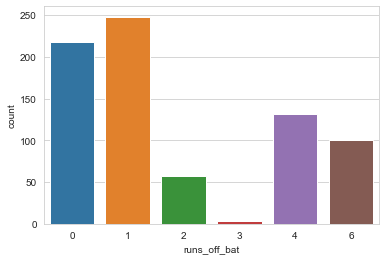

In [129]:
sns.countplot(after_no_ball['runs_off_bat'])

**39. Most runs given by a team as extras?**

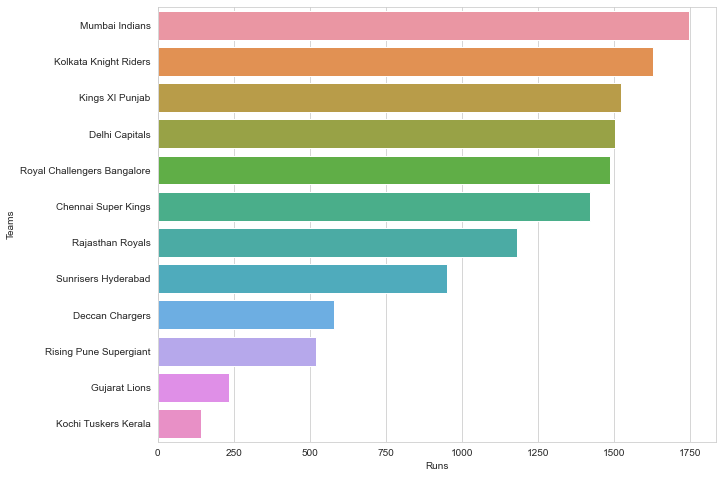

In [130]:
plt.figure(figsize=(10,8))
data = ipl_data1.groupby(['batting_team'])['extras'].agg('sum').sort_values(ascending=False)
sns.barplot(y=data.index,x=data,orient='h')
plt.xlabel('Runs')
plt.ylabel('Teams')
plt.show()

### Player of the Match:-

**40. Which player has won the most number of 'Man of the Match' awards in IPL?**

In [131]:
match_data["player_of_match"].value_counts()[:5]

CH Gayle          18
YK Pathan         16
DA Warner         15
AB de Villiers    15
RG Sharma         14
Name: player_of_match, dtype: int64

Christopher Henry Gayle has won the most number of "Player of the Match" awards in IPL.

## :: End of Analysis ::